In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from  psaw import PushshiftAPI
import datetime
import numpy as np
import pandas_datareader as web
from dateutil import relativedelta
from datetime import datetime as dt
from tabulate import tabulate

In [212]:
df = pd.read_csv('df_with_returns.csv')
df[['Mentions','Returns_0w','Returns_1w','Vol_0w','Vol_1w']].corr() 
#low correlation - not a strong linear relationship between number of mentions and returns
#slightly higher with volatility. 

,Mentions,Returns_0w,Returns_1w,Vol_0w,Vol_1w
Mentions,1.000000,0.111762,-0.077517,0.264625,0.118171
Returns_0w,0.111762,1.000000,-0.093145,0.716392,0.271243
Returns_1w,-0.077517,-0.093145,1.000000,-0.128030,0.499857
Vol_0w,0.264625,0.716392,-0.128030,1.000000,0.274922
Vol_1w,0.118171,0.271243,0.499857,0.274922,1.000000


In [213]:
df = df[['Ticker', 'Mentions',
       'Start_Time', 'End_Time', 'Returns_0w', 'Returns_1w', 'Vol_0w',
       'Vol_1w']]

In [214]:
df = df.sort_values(by=["Start_Time", 'Mentions'])

In [215]:
t = datetime.datetime(2020,11,30)
dates = [t]
for i in range(1,52):
    dates.append(t+relativedelta.relativedelta(weeks=i))

In [216]:
weekly_returns0w = []
weekly_returns1w = [0]
SP500_returns = []
for date in dates:
    return0w = []
    return1w = []
#     start_time = datetime.datetime.strptime(df['Start_Time'][i], '%Y-%m-%d')

    end_time = date + relativedelta.relativedelta(weeks=1)
    price_0w = web.get_data_yahoo('SPY',
                        start = date,
                        end = end_time)['Adj Close']
    SP500_returns.append((price_0w[-1]/price_0w[0]) - 1)
    for i in range(len(df['Start_Time'])):
        if dt.strptime(df['Start_Time'][i], "%Y-%m-%d").date() == date.date():
            return0w.append(df['Returns_0w'][i])
            return1w.append(df['Returns_1w'][i])
    
    if len(return0w) == 0:
        weekly_returns0w.append(0)
    else:
        weekly_returns0w.append(sum(return0w)/len(return0w))
    
    if len(return1w) == 0:
        weekly_returns1w.append(0)
    else:       
        weekly_returns1w.append(sum(return1w)/len(return1w))     
            

In [217]:
weekly_returns0w_cumsum = np.cumsum(weekly_returns0w)
weekly_returns1w_cumsum = np.cumsum(weekly_returns1w[:-1])
SP500_returns_cumsum = np.cumsum(SP500_returns)

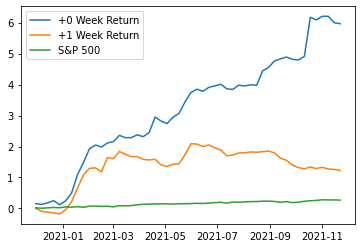

In [218]:
plt.plot(dates, weekly_returns0w_cumsum, label = '+0 Week Return')
plt.plot(dates, weekly_returns1w_cumsum, label = '+1 Week Return')
plt.plot(dates, SP500_returns_cumsum, label = 'S&P 500')
plt.legend()
plt.show()

In [219]:
df_cumreturns = pd.DataFrame({'Dates': dates,
                              'S&P500 Weekly Return': SP500_returns,
                              'S&P500 Cumulative Return' : SP500_returns_cumsum,
                              '+0 Weekly Return': weekly_returns0w,
                              '+0 Cumulative Return': weekly_returns0w_cumsum,
                              '+1 Weekly Return': weekly_returns1w[:-1],
                              '+1 Cumulative Return': weekly_returns1w_cumsum,
                             })

In [222]:
df_cumreturns.tail()

,Dates,S&P500 Weekly Return,S&P500 Cumulative Return,+0 Weekly Return,+0 Cumulative Return,+1 Weekly Return,+1 Cumulative Return
47,2021-10-25,0.009856,0.259805,-0.086394,6.087738,-0.049599,1.288723
48,2021-11-01,0.019324,0.279129,0.116304,6.204042,0.038520,1.327243
49,2021-11-08,-0.003199,0.275930,0.001977,6.206019,-0.054245,1.272998
50,2021-11-15,0.000300,0.276230,-0.208494,5.997525,-0.012982,1.260016
51,2021-11-22,-0.006352,0.269878,-0.034146,5.963379,-0.034146,1.225870


In [221]:
df_cumreturns.to_csv('Final Cumulative Returns.csv')

In [246]:
table = [['Portfolio', 'Total Return', 'Volatility'],
    ['S&P 500', "{:.2%}".format(float(df_cumreturns['S&P500 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['S&P500 Weekly Return']))],
    ['Week 0 Strategy', "{:.2%}".format(float(df_cumreturns['+0 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['+0 Weekly Return']))],
    ['Week 1 Strategy', "{:.2%}".format(float(df_cumreturns['+1 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['+1 Weekly Return']))],
        ]
print(tabulate(table, headers='firstrow'))

Portfolio        Total Return    Volatility
---------------  --------------  ------------
S&P 500          26.99%          1.59%
Week 0 Strategy  596.34%         23.48%
Week 1 Strategy  122.59%         15.15%
